In [1]:
import os

import sent2vec
import numpy as np
from scipy.spatial.distance import cosine

In [2]:
model = sent2vec.Sent2vecModel()
model.load_model('/data/pretrained/sent2vec/wiki_ru.bin')

In [3]:
class Sent2Vec:
    def __init__(self, model):
        self.model = model

    def __call__(self, batch):
        untokenized_batch = []
        for sentence in batch:
            untokenized_batch.append(' '.join([w.lower() for w in sentence]))
        return self.model.embed_sentences(untokenized_batch)

In [4]:
sent2vec_embedder = Sent2Vec(model)

In [5]:
from deepPavlovEval import Evaluator
evaluator = Evaluator()

other_results_path = 'results/results.jsonl'
if os.path.exists(other_results_path):
    _ = evaluator.load_results('results/results.jsonl')

2018-11-16 18:18:59.890 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 97: Cannot find /home/not_a_robot/Documents/deepPavlovEval/data/Rusentiment/valid.csv file
2018-11-16 18:19:00.52 DEBUG in 'matplotlib.pyplot'['pyplot'] at line 211: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [17]:
 _ = evaluator.load_results('results/results.jsonl')

In [10]:
%%time
evaluator.evaluate(sent2vec_embedder, model_name='Sent2vec')

/home/not_a_robot/Documents/deepPavlovEval/deepPavlovEval/utils.py:124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/not_a_robot/Envs/sent/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 32.8 s, sys: 3.15 ms, total: 32.8 s
Wall time: 32.8 s


{'paraphraser': {'pearson correlation': 0.4345175373133634,
  'f1_best': 0.7736526946107785,
  'accuracy_best': 0.685097419694576,
  'roc_auc': 0.7519797509982472},
 'msrvid': {'pearson correlation': 0.5848559041694862},
 'xnli': {'f1(clf_knn)': 0.3723006750592957,
  'accuracy(clf_knn)': 0.3844311377245509,
  'f1(clf_svm)': 0.4817528082161114,
  'accuracy(clf_svm)': 0.48283433133732534},
 'rusentiment': {'f1(clf_knn)': 0.3383165545283108,
  'accuracy(clf_knn)': 0.40175261206606,
  'f1(clf_svm)': 0.345020315547697,
  'accuracy(clf_svm)': 0.5294910684192787}}

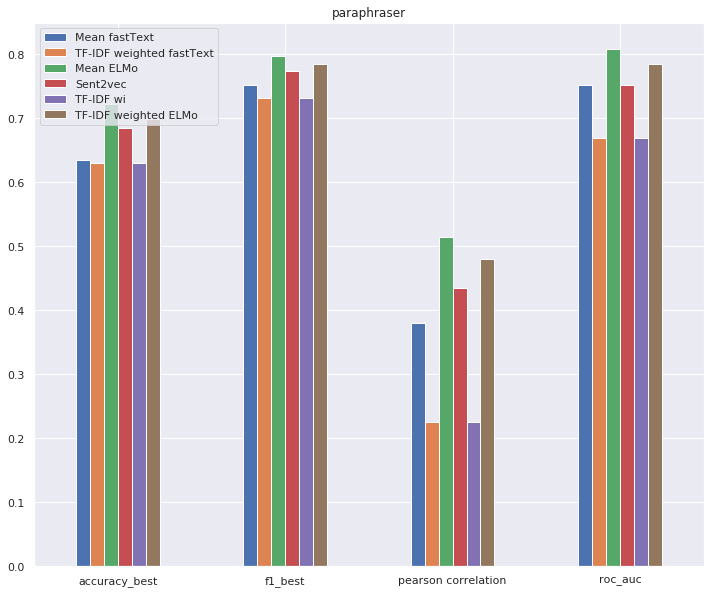

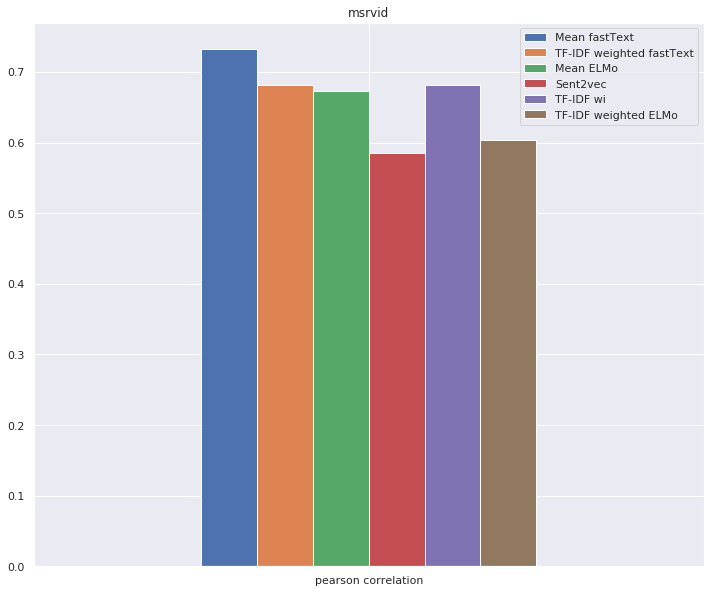

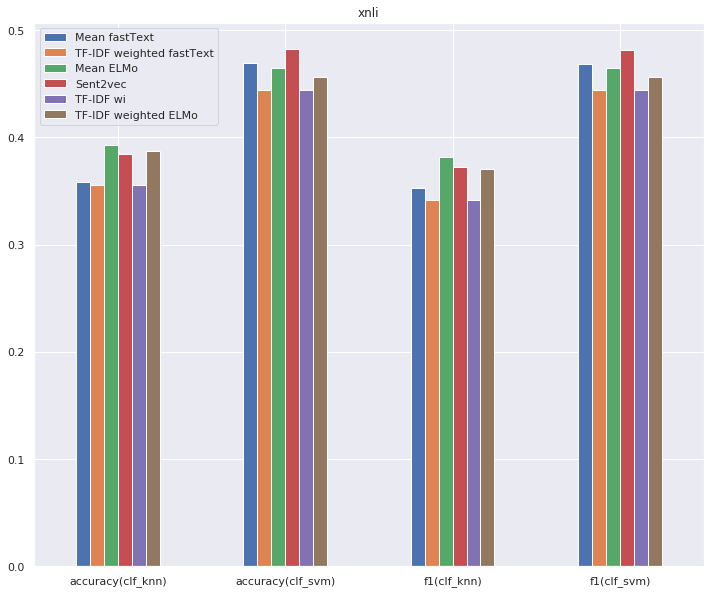

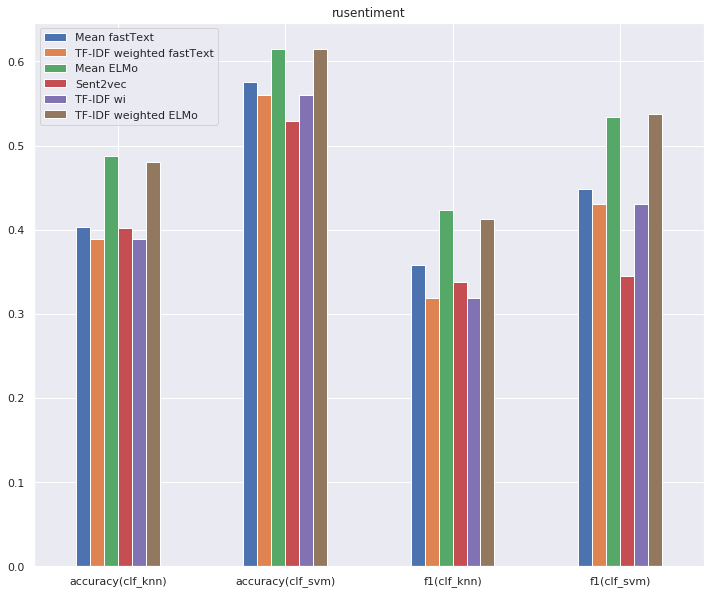

In [18]:
evaluator.plot_results(save=True, show=True, kind='bar', rot=0)